## Importing modules and adding project directory

In [1]:
# including the project directory to the notebook level
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
#importing modules
import warnings
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10,7)
plt.rc('legend',**{'fontsize':16})
from CoolProp.HumidAirProp import HAPropsSI

#modules for data reading and parsing dates
from dataprocess import dataprocessor as dp
from dataprocess import results_process as rp

In [3]:
def approximate_match(col_name):
    for name in rp.addl['names_abreviation'].keys():
        if col_name in name:
            return rp.addl['names_abreviation'][name]
    return col_name

## Getting the results of the Chilled Water Energy Learning

### load and merge the dataframes; inverse scale the data

In [4]:
# load data path
cwedata = dp.readfolder('../models/adaptive/Trial_0/cwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
cwe = cwedata.return_df(processmethods=processmethods)


# inverse scale normalized values
cwe = rp.process_plots(cwe, 'Actual cwe', 'Predicted cwe')
# process names for better understanding
cwe.columns = [approximate_match(i) for i in cwe.columns]

### Plot all the data related to Prediction vs True Cooling Water energy

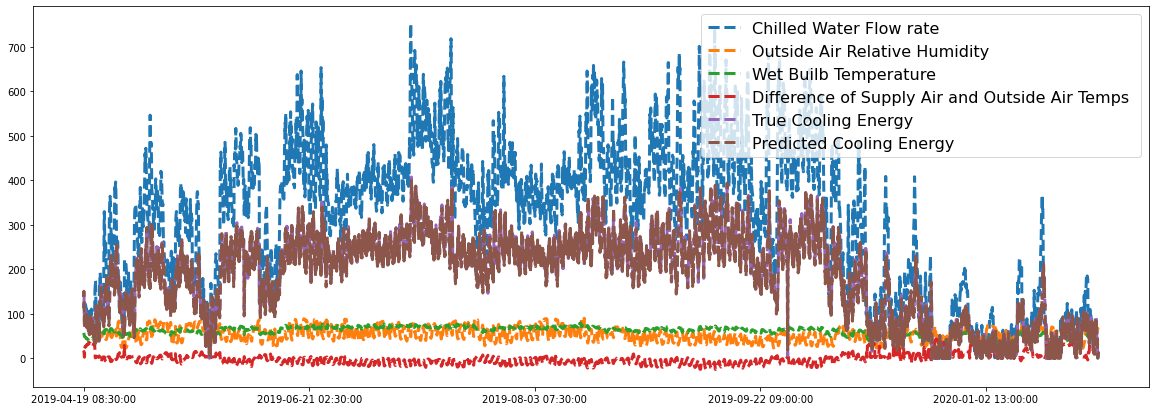

In [5]:
plt.rcParams['figure.figsize']=(20,7)
cwe.plot(y=cwe.columns[:], linewidth=3.0, style='--')

### Plot a small timelines for better visualization

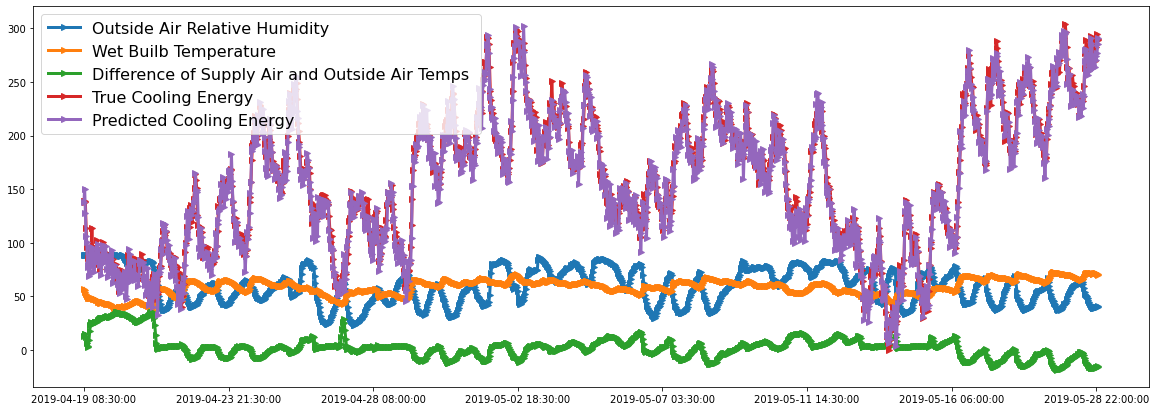

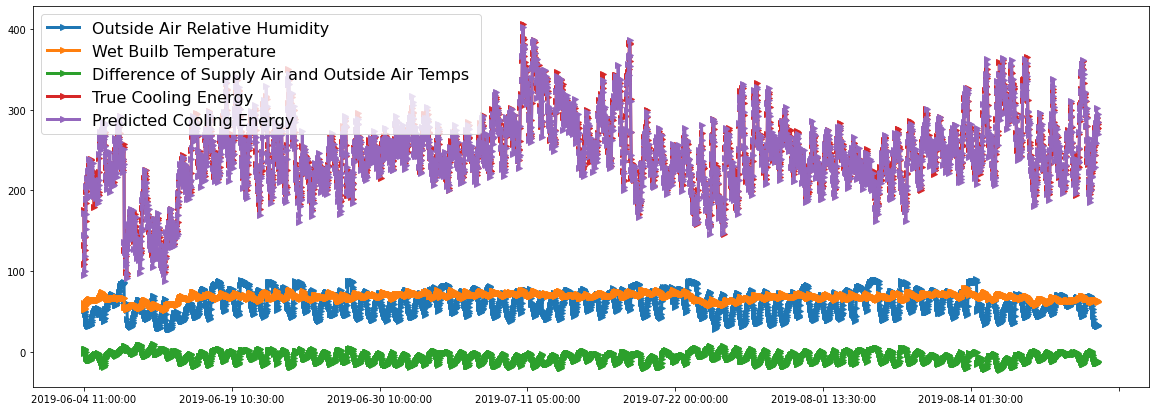

In [6]:
plt.rcParams['figure.figsize']=(20,7)
#warmer weather
masking = (cwe.index >= '2019-04-19 00:00:00') & (cwe.index <= '2019-05-28 23:59:59')
cwe.loc[masking,:].plot(y=cwe.columns[1:], linewidth=3.0, style='>-')
#cooler weather
masking = (cwe.index >= '2019-06-01 00:00:00') & (cwe.index <= '2019-08-28 23:59:59')
cwe.loc[masking,:].plot(y=cwe.columns[1:], linewidth=3.0, style='>-')

### Plot the weekly relearn error

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Name of the file:  ../models/adaptive/Trial_0/cwe/30min Results_File.txt


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Text(11, 44, 'Fully Dense Model used for Energy Prediction')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


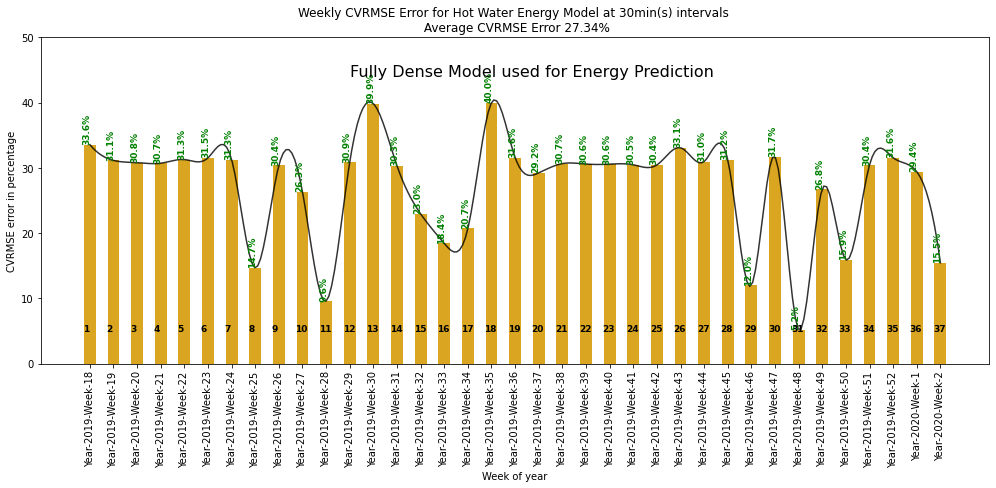

In [7]:
rp.barchart_regression(path='../models/adaptive/Trial_0/cwe/', period=6, savepath='../models/adaptive/Trial_0/cwe/')
plt.text(x=11,y=44,s='Fully Dense Model used for Energy Prediction',fontsize=16)

##  Getting the results of the Hot Water Energy Learning

In [8]:
# load data path
hwedata = dp.readfolder('../models/adaptive/Trial_0/hwe/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
hwe = hwedata.return_df(processmethods=processmethods)


# inverse scale normalized values
hwe = rp.process_plots(hwe, 'Actual hwe', 'Predicted hwe')
# process names for better understanding
hwe.columns = [approximate_match(i) for i in hwe.columns]

### Plot all the data related to Prediction vs True Hot Water energy

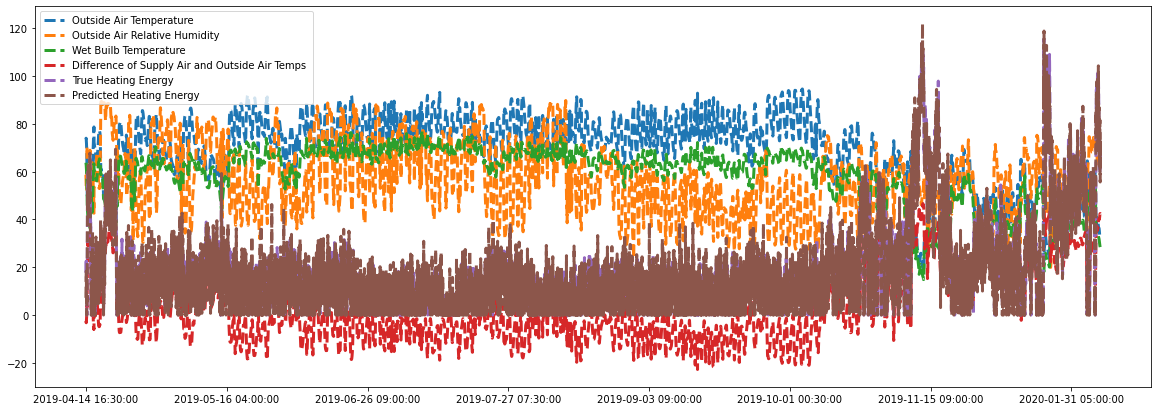

In [9]:
plt.rcParams['figure.figsize']=(20,7)
hwe.plot(y=hwe.columns, linewidth=3.0, style='--')

### Plot a small timeline for better visualization

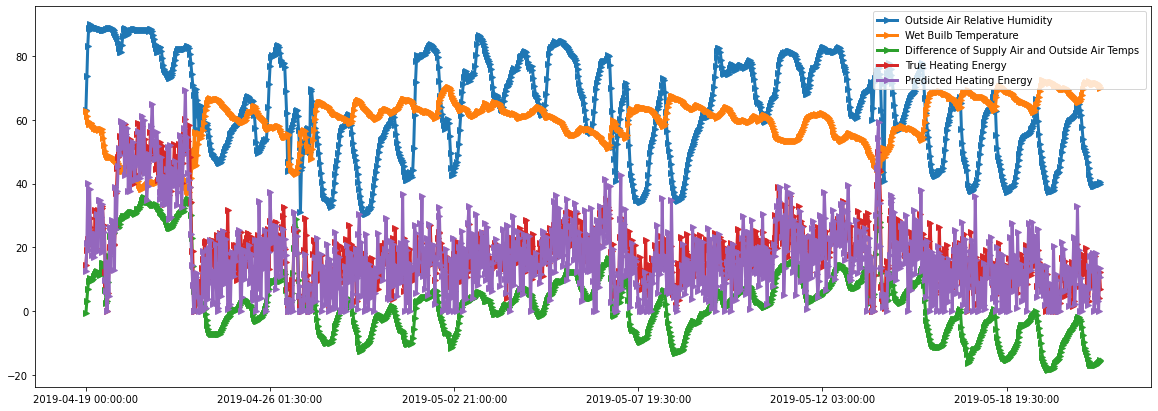

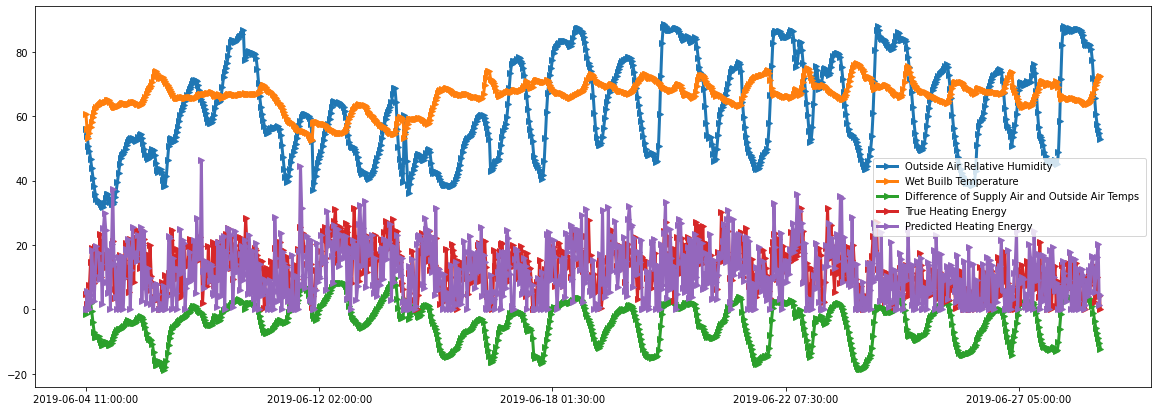

In [10]:
plt.rcParams['figure.figsize']=(20,7)
#warmer weather
masking = (hwe.index >= '2019-04-19 00:00:00') & (hwe.index <= '2019-05-28 23:59:59')
hwe.loc[masking,:].plot(y=hwe.columns[1:], linewidth=3.0, style='>-')
#cooler weather
masking = (hwe.index >= '2019-06-01 00:00:00') & (hwe.index <= '2019-06-28 23:59:59')
hwe.loc[masking,:].plot(y=hwe.columns[1:], linewidth=3.0, style='>-')

### Plot the weekly relearn error

Name of the file:  ../models/adaptive/Trial_0/hwe/30min Results_File.txt


Text(11, 43, 'Fully Dense Model used for Energy Prediction')

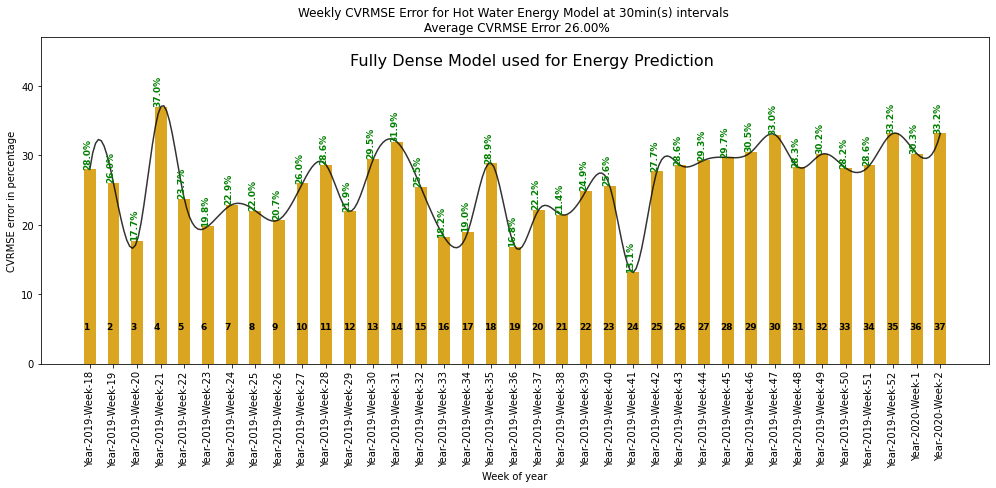

In [11]:
rp.barchart_regression(path='../models/adaptive/Trial_0/hwe/', period=6, savepath='../models/adaptive/Trial_0/hwe/')
plt.text(x=11,y=43,s='Fully Dense Model used for Energy Prediction',fontsize=16)

## Getting the results of the Hot Water Energy Valve state

In [12]:
# load data path
vlvdata = dp.readfolder('../models/adaptive/Trial_0/vlv/detailedplots/')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
processmethods = ['files2dflist', 'merge_dflist']
vlv = vlvdata.return_df(processmethods=processmethods)


# convert probabilities to classes
vlv = rp.process_plots_softmax(vlv, 'Actual valve_state', 'Predicted valve_state')
# scale for better visualization
#vlv['Actual valve_state'] = vlv['Actual valve_state']*100
#vlv['Predicted valve_state'] = vlv['Predicted valve_state']*100


# process names for better understanding
vlv.columns = [approximate_match(i) for i in vlv.columns]

### Plot all the data for predicting valve state

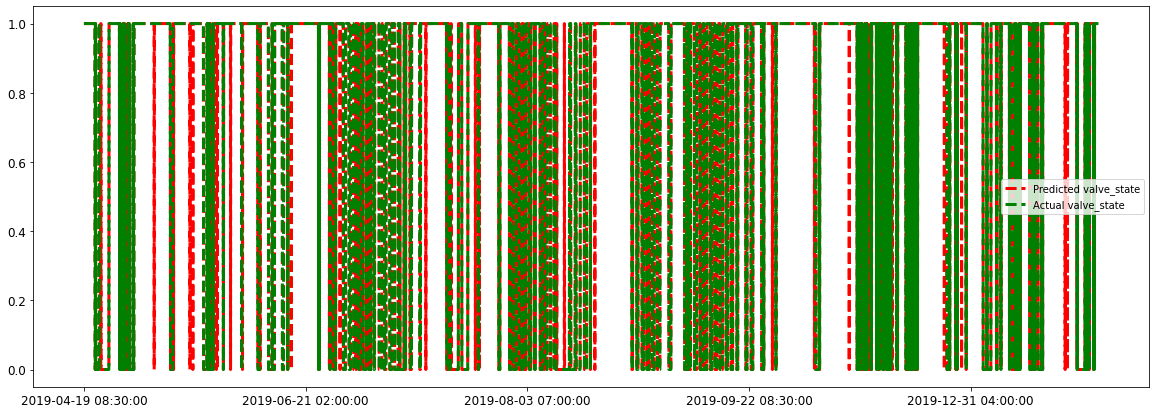

In [13]:
plt.rcParams['figure.figsize']=(20,7)
vlv.plot(y=vlv.columns[[-1,-2]], linewidth=3.0, style=['r--','g--'],fontsize=12)

### Plot the tested metrics

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


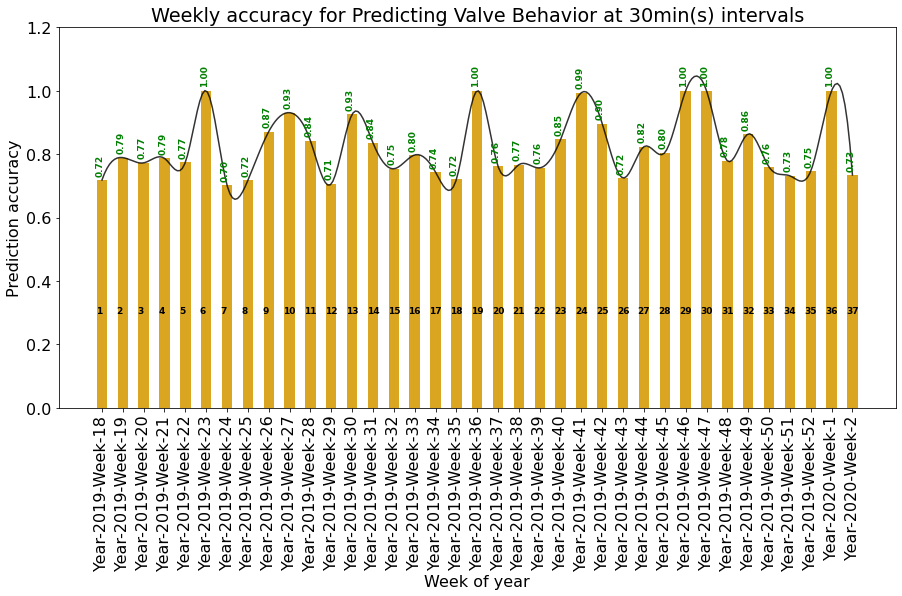

In [14]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='accuracy')

Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


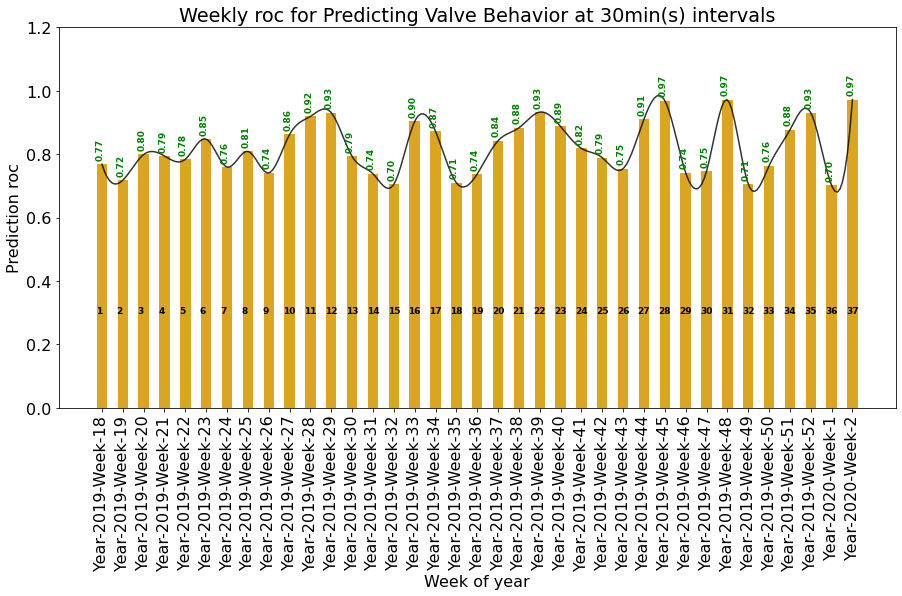

In [15]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='roc')

Name of the file:  ../models/adaptive/Trial_0/vlv/30min Results_File.txt


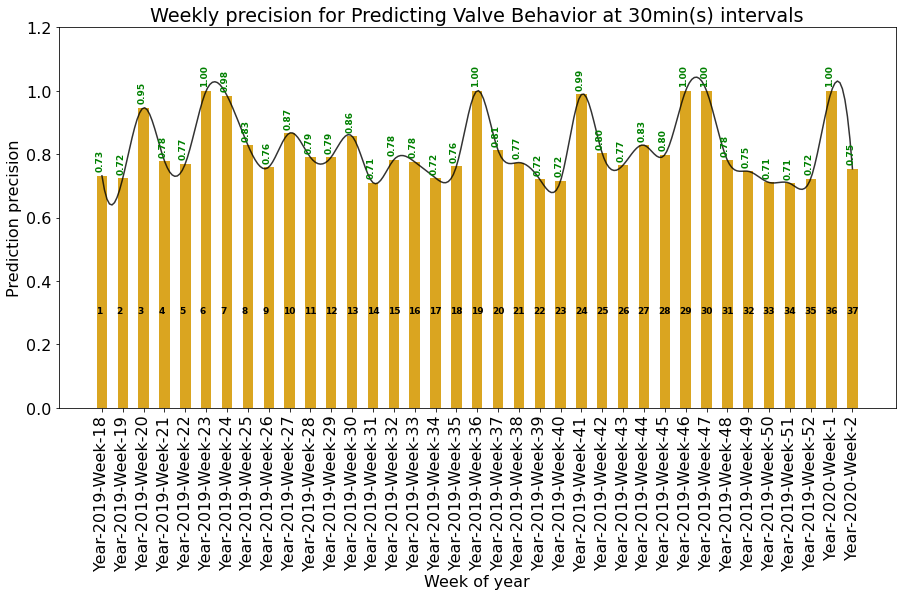

In [16]:
rp.barchart_classifier(path='../models/adaptive/Trial_0/vlv/', period=6,
                    savepath='../models/adaptive/Trial_0/vlv/', metricname='precision')

## Results on Reinforcement Learning

In [17]:
# load data path
rldata = dp.readfile('../models/adaptive/Trial_0/rl/performance/EnvId0-results.csv')

# Basic preprocessing read data and perform certain available operations and return processed dataframe
rl_scaled = rldata.return_df(processmethods=['file2df'])

In [18]:
# load the scaler for scaling and inverse scaling the dataframe
scaler = dp.dataframescaler('../models/adaptive/Trial_0/datastats.pkl')
scaler.stats.loc['max','sat'] = scaler.stats.loc['max','sat_stpt']
scaler.stats.loc['min','sat'] = scaler.stats.loc['min','sat_stpt']

input_columns = ['cwe','hwe','cwe','hwe','oat',  'orh', 'sat', 'avg_stpt']
df_2scale_columns = ['rl_cwe', 'rl_hwe', 'hist_cwe', 'hist_hwe', 'oat', 'orh', 'T_rl_disch', 'avg_stpt']

# scale the dataframe relevant coumns
rl = rp.inverse_scale_results(rl_scaled, input_columns, df_2scale_columns, scaler)

Text(0, 0.5, 'Energy Consumed in kBTUs every 30 mins')

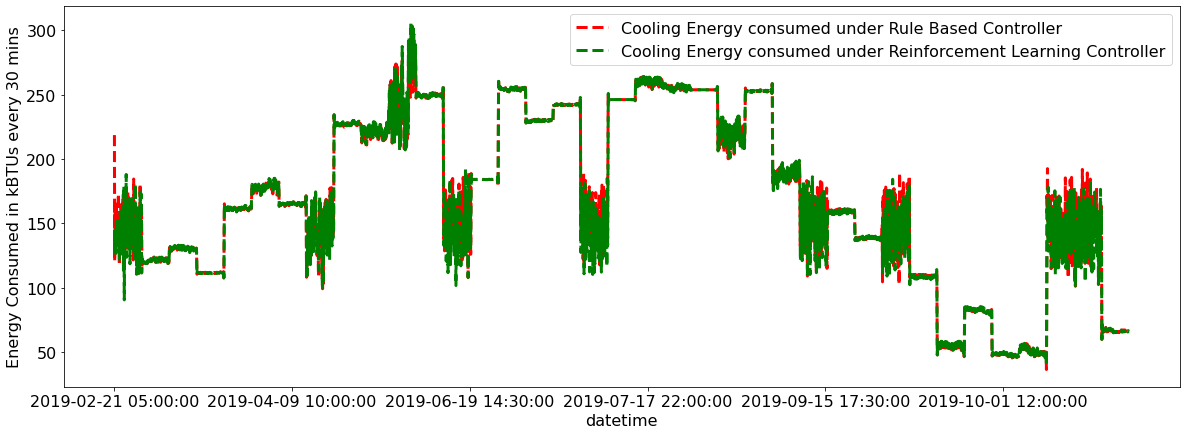

In [19]:
plt.rcParams['figure.figsize'] = (20, 7)
ax = rl.plot(y=[
    'hist_cwe',
    'rl_cwe',
],
        linewidth=3.0,
        style=['r--', 'g--'],
        label=[
            'Cooling Energy consumed under Rule Based Controller',
            'Cooling Energy consumed under Reinforcement Learning Controller'
        ])
ax.set_ylabel( 'Energy Consumed in kBTUs every 30 mins')

Text(0, 0.5, 'Energy Consumed in kBTUs every 30 mins')

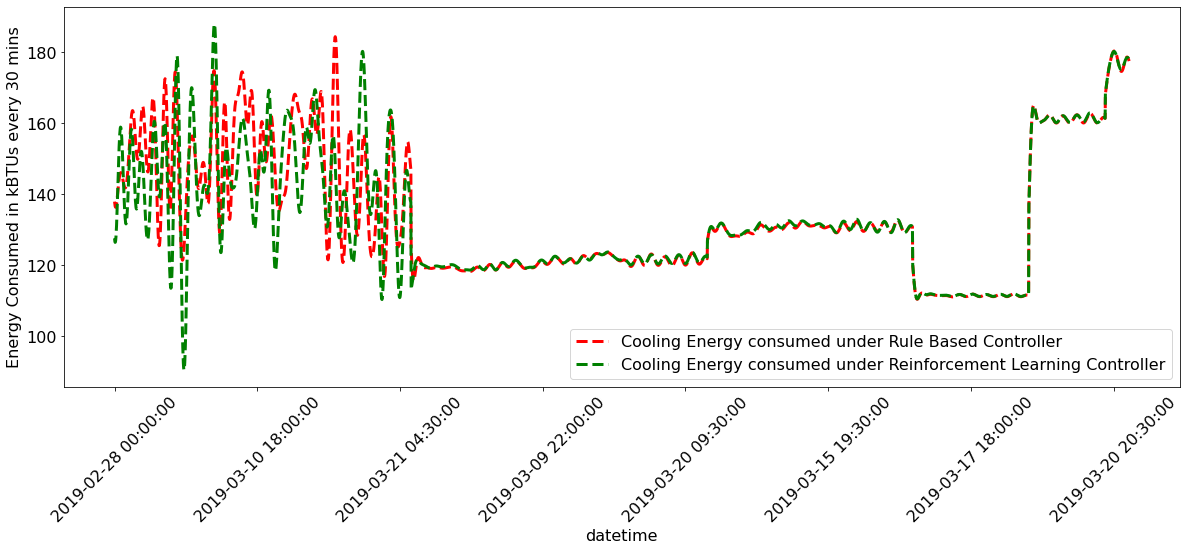

In [20]:
plt.rcParams['figure.figsize'] = (20, 7)
masking = (rl.index >= '2019-02-28 00:00:00') & (rl.index <=
                                                 '2019-03-21 23:59:59')
ax = rl.loc[masking, :].plot(
    y=[
        'hist_cwe',
        'rl_cwe',
    ],
    linewidth=3.0,
    style=['r--', 'g--'],
    rot=45,
    label=[
        'Cooling Energy consumed under Rule Based Controller',
        'Cooling Energy consumed under Reinforcement Learning Controller'
    ])
ax.set_ylabel( 'Energy Consumed in kBTUs every 30 mins')

Text(0, 0.5, 'Energy Consumed in kBTUs every 30 mins')

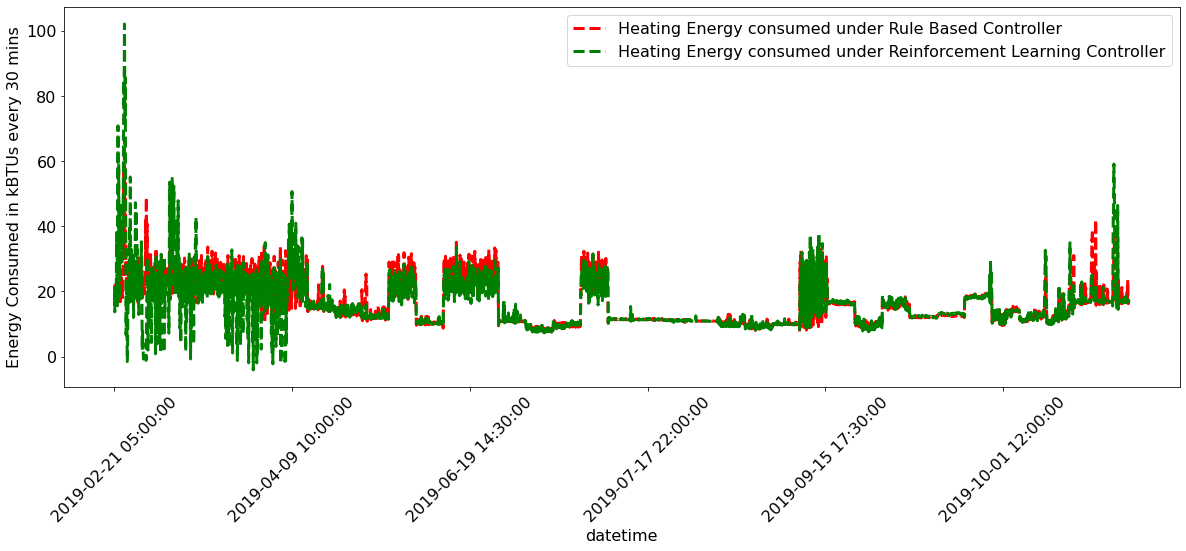

In [21]:
plt.rcParams['figure.figsize'] = (20, 7)
ax = rl.plot(
    y=[
        'hist_hwe',
        'rl_hwe',
    ],
    linewidth=3.0,
    style=['r--', 'g--'],
    rot=45,
    label=[
        'Heating Energy consumed under Rule Based Controller',
        'Heating Energy consumed under Reinforcement Learning Controller'
    ])
ax.set_ylabel('Energy Consumed in kBTUs every 30 mins')

Text(0, 0.5, 'Energy Consumed in kBTUs every 30 mins')

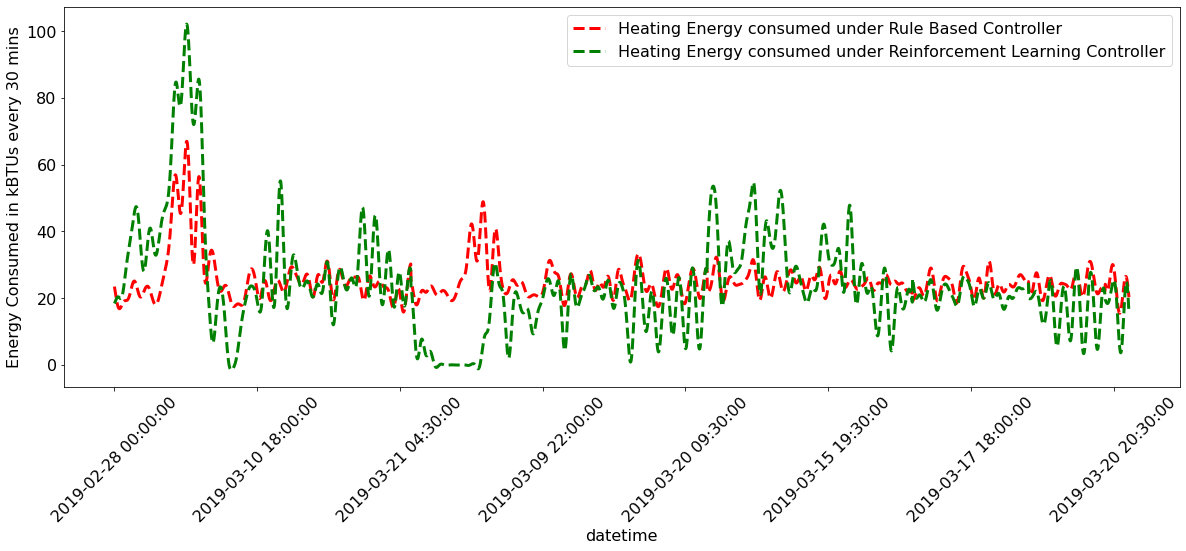

In [22]:
plt.rcParams['figure.figsize'] = (20, 7)
masking = (rl.index >= '2019-02-28 00:00:00') & (rl.index <=
                                                 '2019-03-21 23:59:59')
ax =rl.loc[masking, :].plot(
    y=[
        'hist_hwe',
        'rl_hwe',
    ],
    linewidth=3.0,
    style=['r--', 'g--'],
    rot=45,
    label=[
        'Heating Energy consumed under Rule Based Controller',
        'Heating Energy consumed under Reinforcement Learning Controller'
    ])
ax.set_ylabel( 'Energy Consumed in kBTUs every 30 mins')

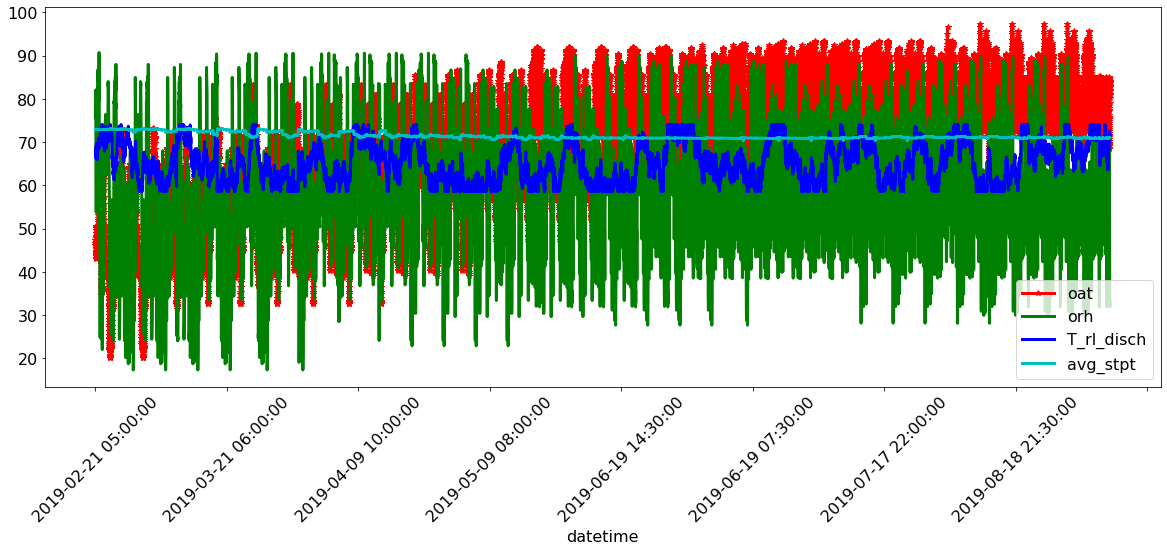

In [23]:
plt.rcParams['figure.figsize'] = (20, 7)
masking = (rl.index >= '2019-01-01 00:00:00') & (rl.index <= '2019-08-28 23:59:59')
rl.loc[masking, :].plot(y=['oat', 'orh', 'T_rl_disch', 'avg_stpt', ],
                                      linewidth=3.0,
                                      style=['r*-', 'g-', 'b-', 'c-'], rot=45)
#plt.ylim((55,75))

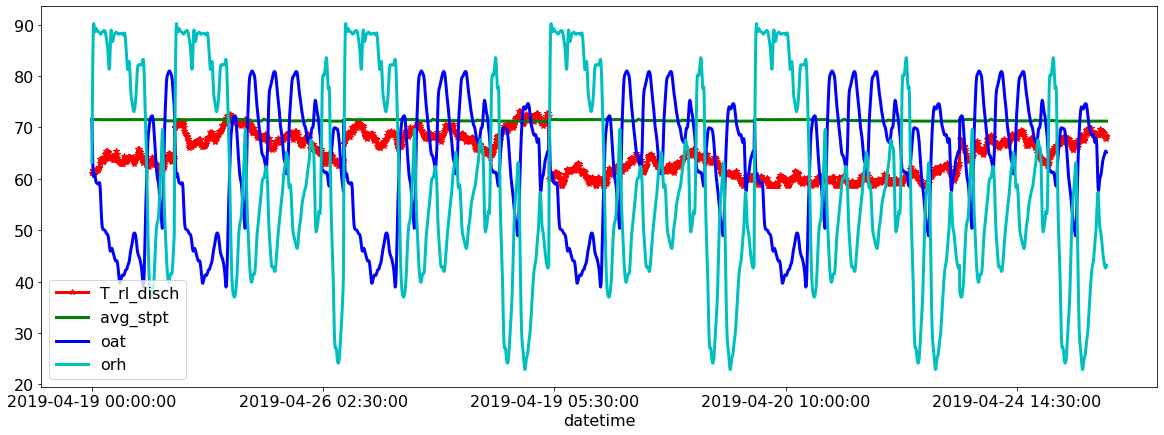

In [24]:
plt.rcParams['figure.figsize'] = (20, 7)
masking = (rl.index >= '2019-04-19 00:00:00') & (rl.index <= '2019-04-28 23:59:59')
rl.loc[masking, :].plot(y=['T_rl_disch', 'avg_stpt', 'oat', 'orh'],
                                      linewidth=3.0,
                                      style=['r*-', 'g-', 'b-', 'c-'], rot=0)
#plt.ylim((55,75))

![image](../models/adaptive/Trial_3/AverageReward.png)

In [25]:
rl.describe()

,rl_cwe,rl_hwe,hist_cwe,hist_hwe,reward_energy,reward_comfort,oat,orh,T_rl_disch,avg_stpt
count,57091.000000,57091.000000,57091.000000,57091.000000,5.709100e+04,5.709100e+04,57091.000000,57091.000000,57091.000000,57091.000000
mean,169.260746,15.940987,170.173138,16.558312,-7.555365e-07,-2.105699e-04,70.619897,54.135473,65.272256,71.164944
std,64.452246,7.368225,63.831744,6.653849,1.997867e-05,1.378687e-04,14.227802,15.785213,4.341264,0.752004
min,39.483018,-4.105545,36.447262,7.678268,-2.454782e-04,-6.091535e-04,17.821972,17.309428,58.587369,66.053821
25%,127.863599,10.966273,130.018820,11.082941,-1.180147e-06,-3.217494e-04,62.703216,42.664567,61.545582,70.790476
50%,161.661790,13.786359,163.478839,14.295544,-6.572339e-08,-1.958165e-04,73.129383,53.116261,64.994227,71.005969
75%,229.894071,19.823030,229.967814,22.222962,2.952437e-07,-9.154858e-05,80.806985,64.807804,68.585127,71.333333
max,305.174249,102.112562,291.342987,67.002737,1.981696e-04,-3.204671e-09,97.319737,90.732326,73.986841,73.176358


In [26]:
# plt.rcParams['figure.figsize'] = (20, 7)
# masking = (rl.index >= '2019-01-01 05:00:00') & (rl.index <= '2019-12-31 23:59:59')
# rl['total_reward'] = rl['reward_energy']+ rl['reward_comfort']
# rl.loc[masking, :].plot(y=['reward_energy','reward_comfort', 'total_reward'],
#                                       linewidth=3.0,
#                                       style=['r*-', 'g-', 'b-', 'c-'])